Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [465]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [466]:
df = pd.read_csv("D:/Kì 6/Nhập môn học máy/Thực hành/Lab05/Clustered_Customer_Data.csv")

In [467]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [469]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


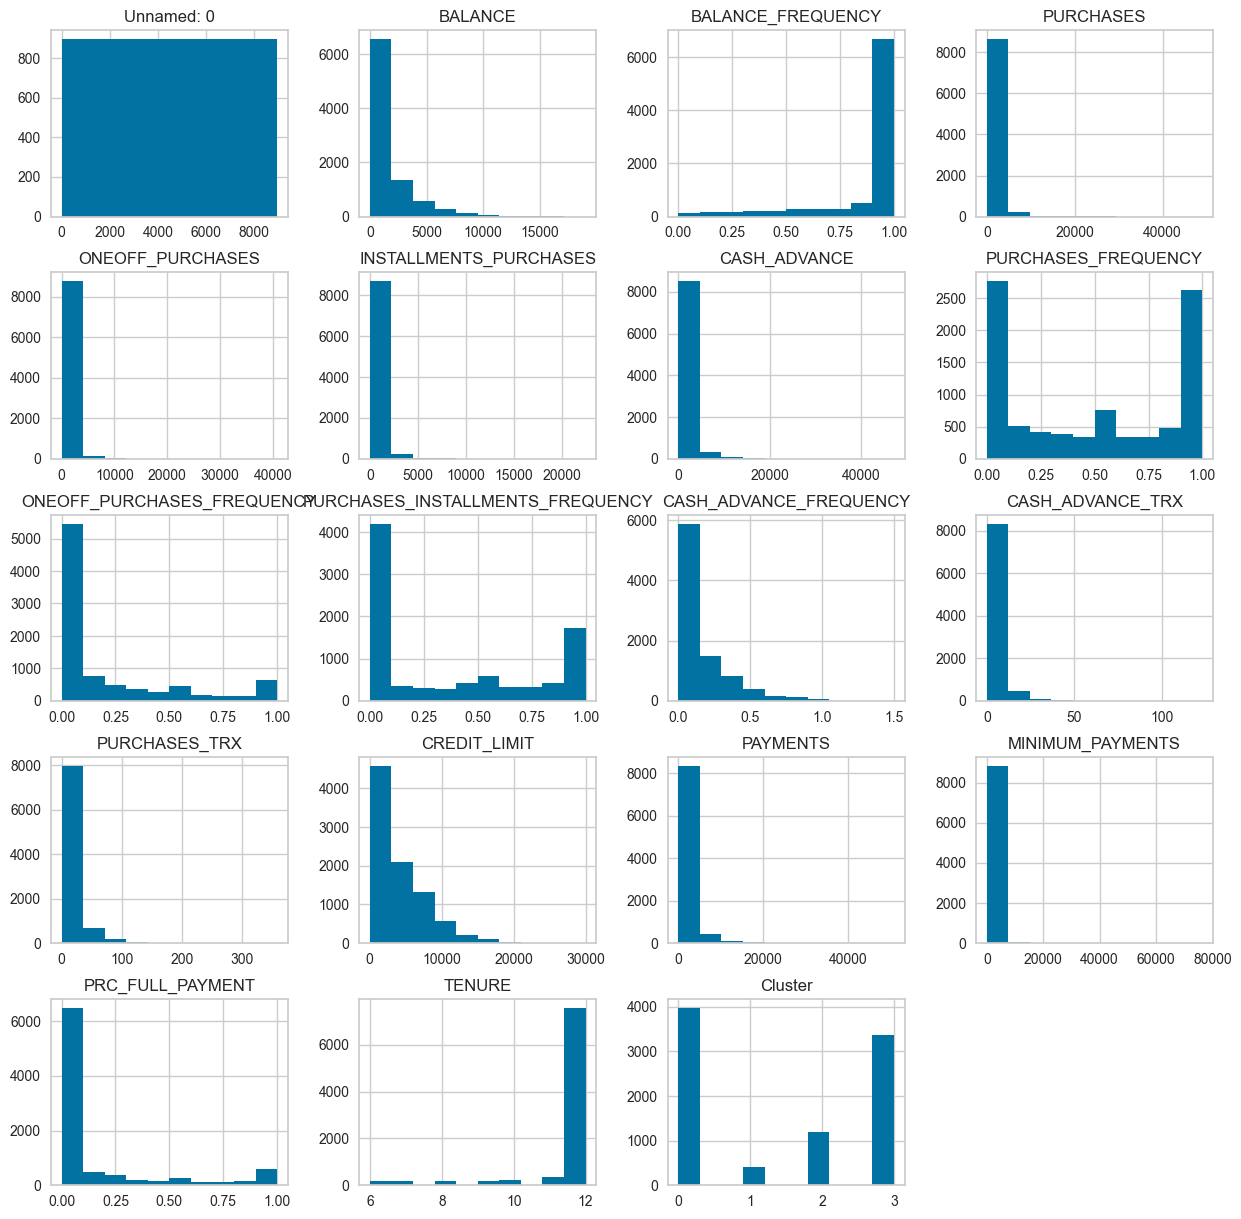

In [470]:
df.hist(figsize=(15, 15))
plt.show()

In [471]:
feature = df.drop(columns=[df.columns[0],'TENURE', 'Cluster'])
feature

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


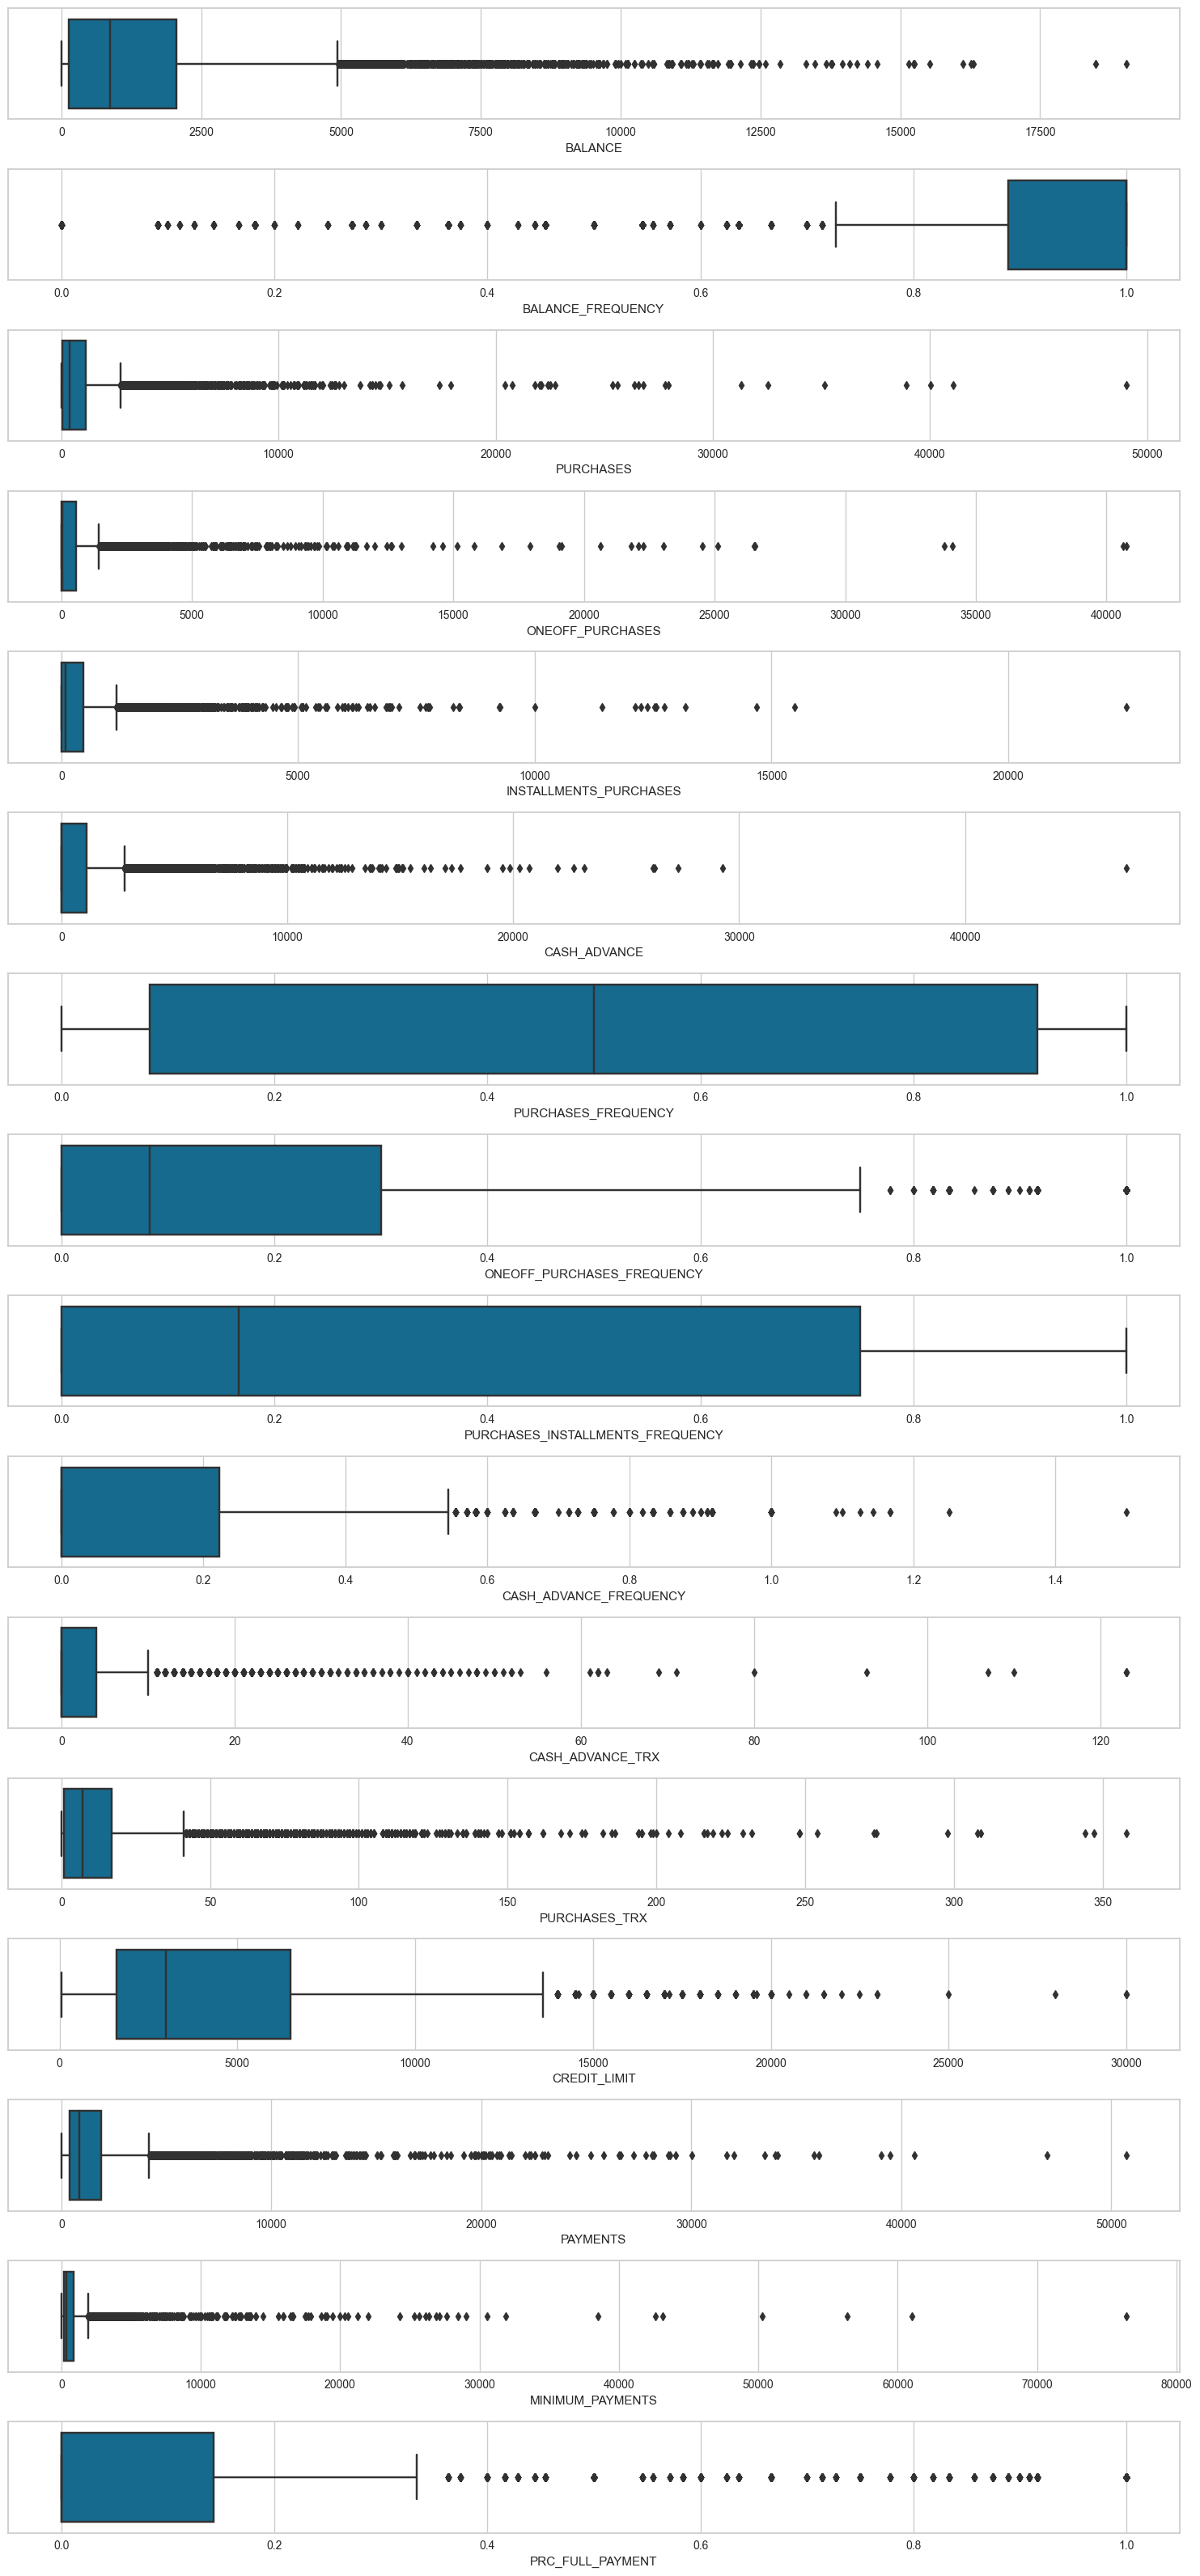

In [472]:
fig, axes = plt.subplots(len(feature.columns), 1, figsize=(15, 2*len(feature.columns)))
for i, column in enumerate(feature.columns):
    sns.boxplot(x=feature[column], ax=axes[i])

plt.tight_layout()
plt.show()

# Data Preprocessing

In [473]:
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [474]:
for col in feature.columns:
    q1 = np.percentile(feature[col], 25)
    q3 = np.percentile(feature[col], 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    max_value = q3 + threshold
    min_value = q1 - threshold
    feature.loc[feature[col] > max_value, col] = max_value
    feature.loc[feature[col] < min_value, col] = min_value
feature.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.304199,1347.084165,593.711582,0.087223
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.755481,1272.806272,572.040335,0.138616
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1904.229874,0.357143


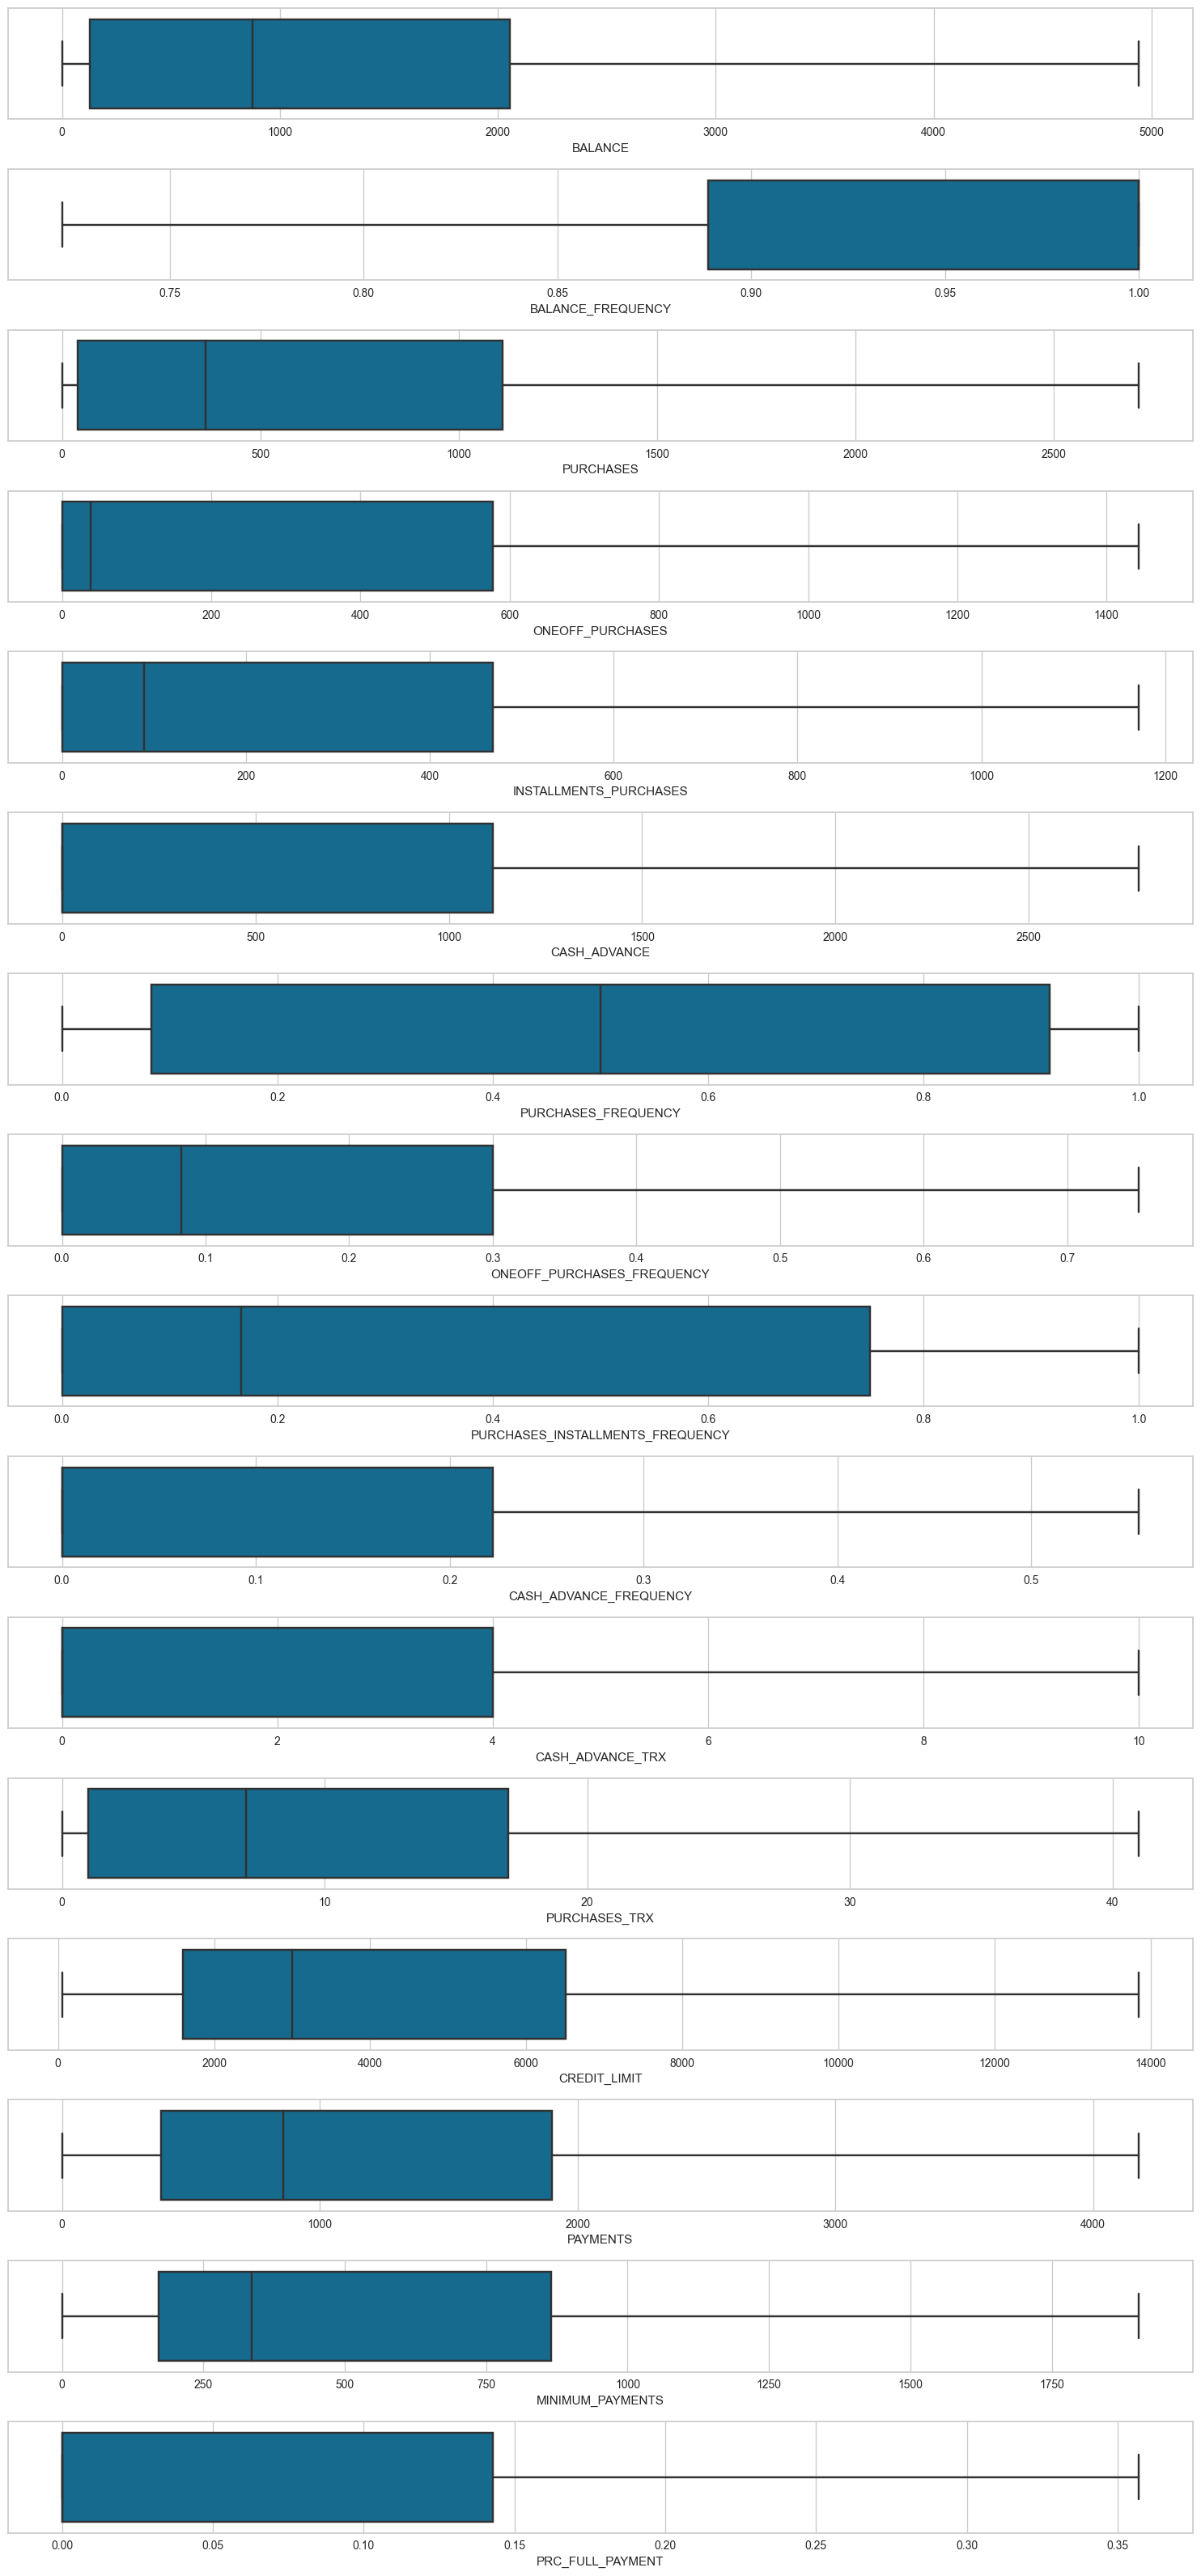

In [475]:
fig, axes = plt.subplots(len(feature.columns), 1, figsize=(15, 2*len(feature.columns)))
for i, column in enumerate(feature.columns):
    sns.boxplot(x=feature[column], ax=axes[i])

plt.tight_layout()
plt.show()

# Feature Engineering

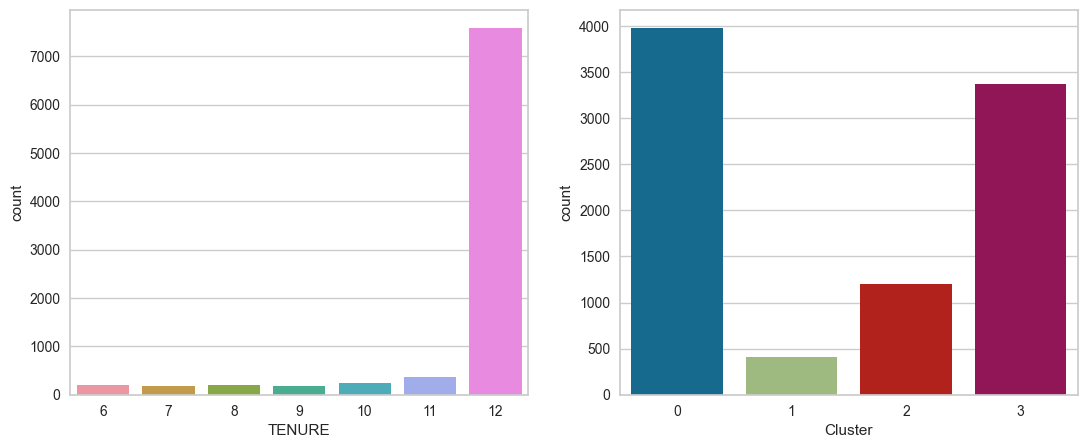

In [476]:
cat_cols = df[['TENURE', 'Cluster']]
fig, axes = plt.subplots(1, len(cat_cols.columns), figsize=(13, 5))
for i, col in enumerate(cat_cols.columns):
    sns.countplot(x=col, data=df, ax=axes[i])


In [477]:
new_df = pd.concat([feature, cat_cols], axis=1)
new_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,6,3
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


<AxesSubplot: >

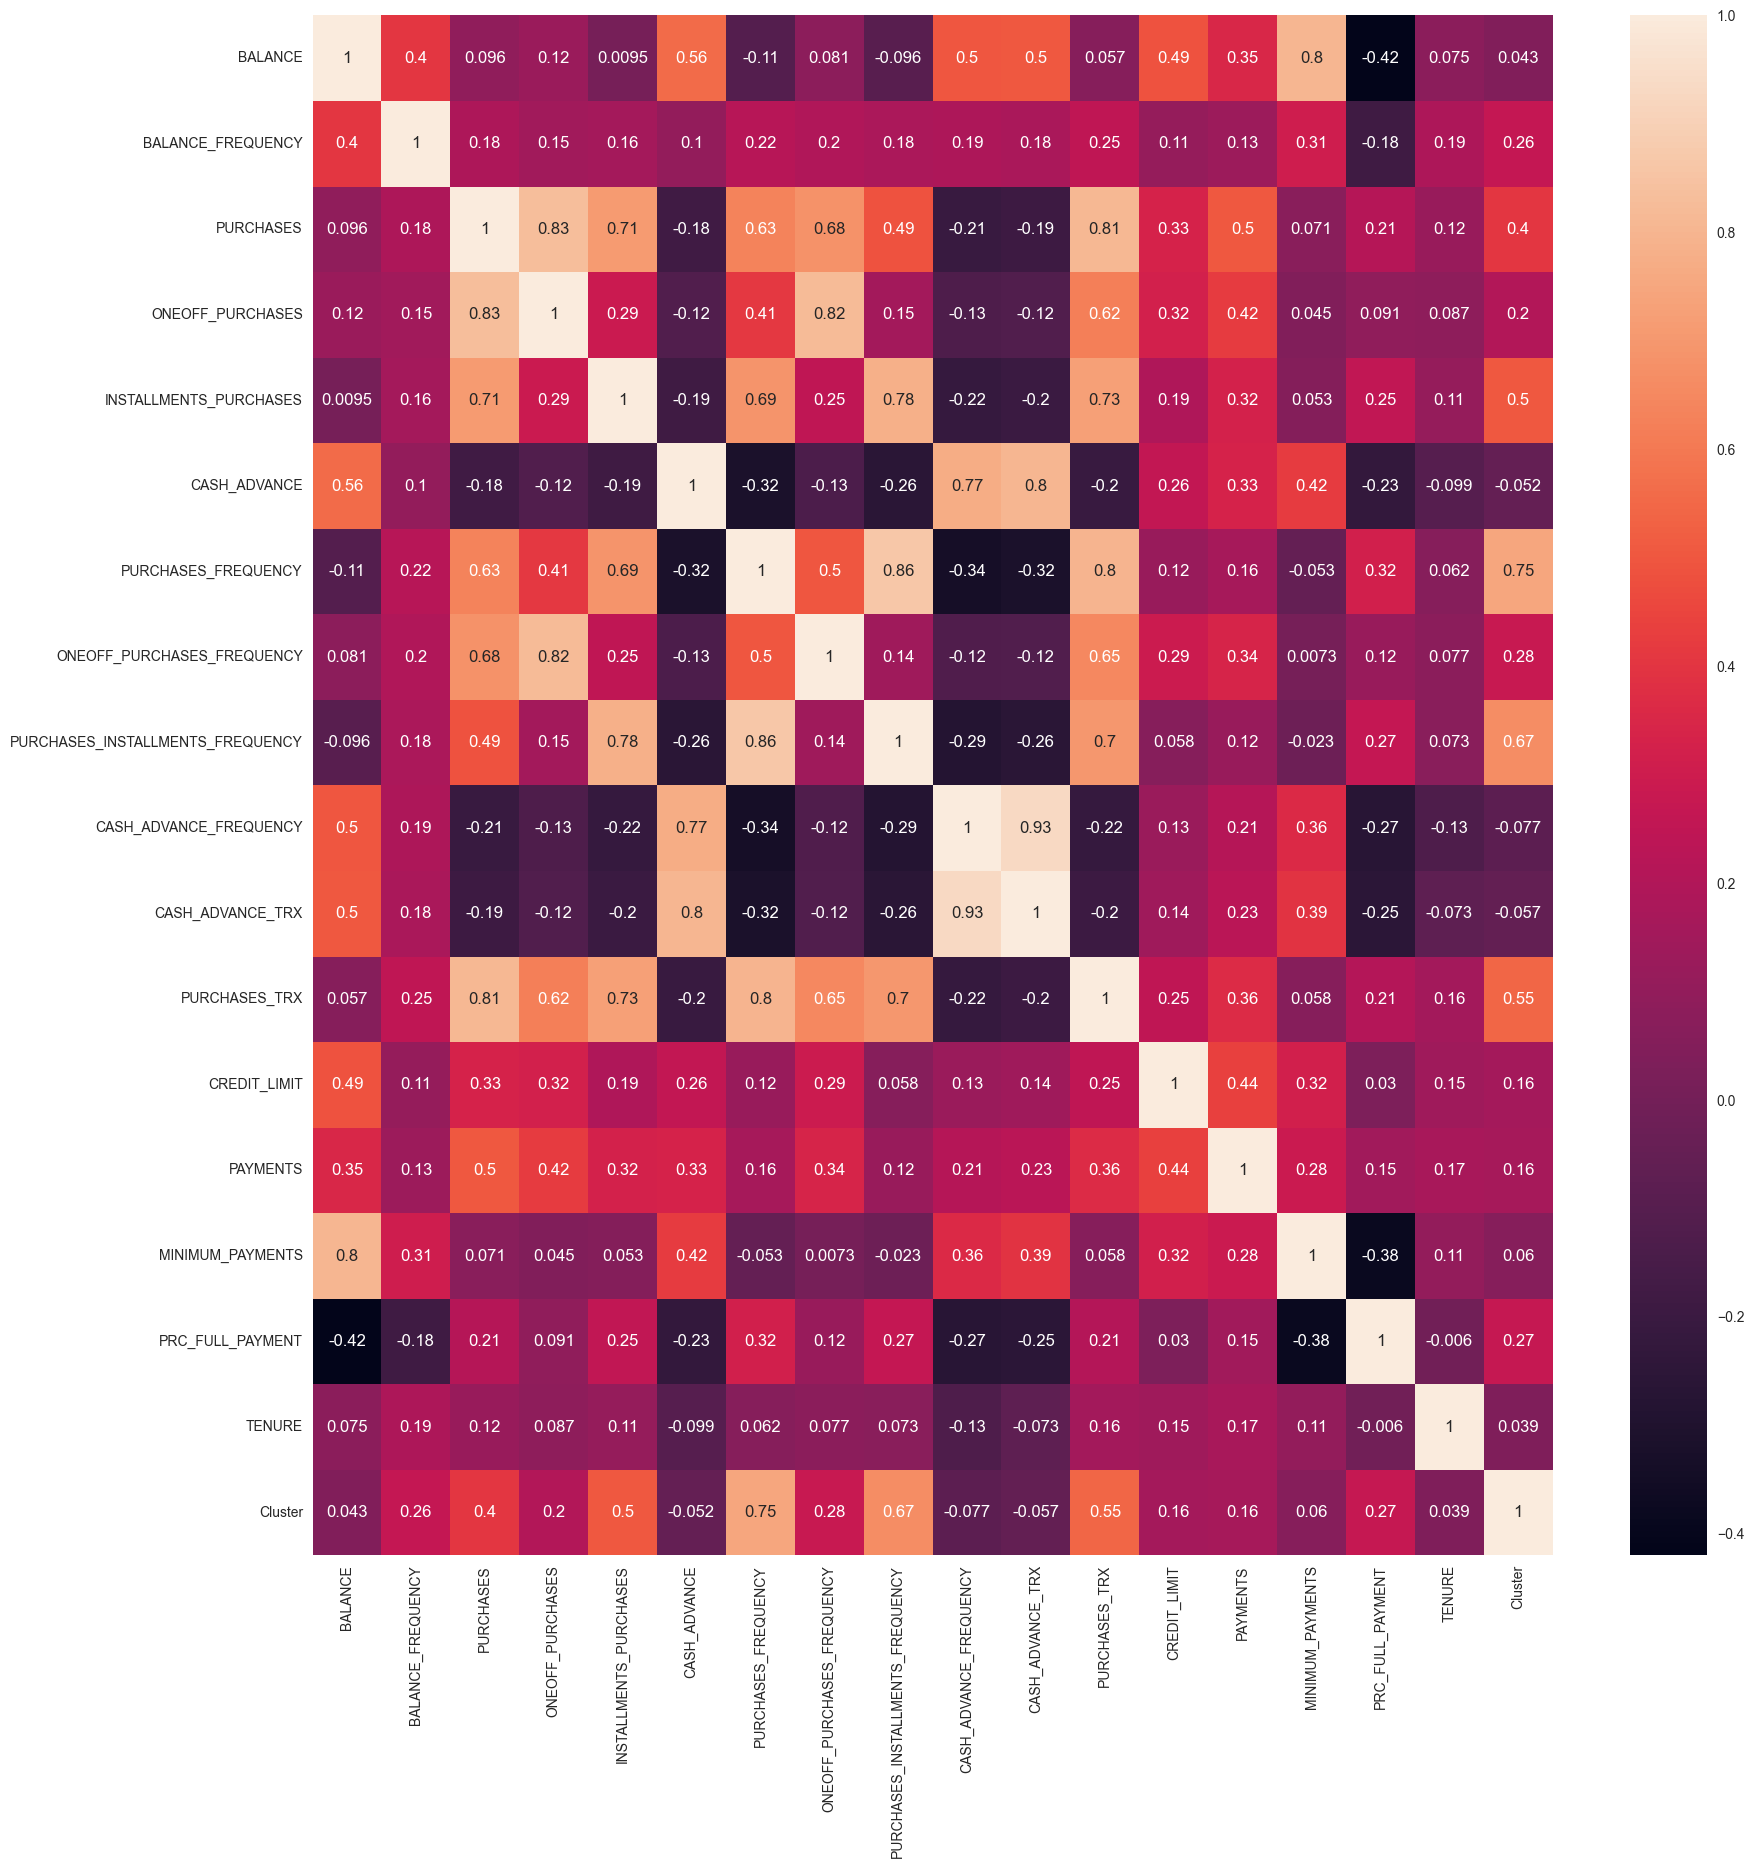

In [478]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(), annot=True)

In [479]:
data = new_df.copy()
X = data.drop(columns = ['Cluster']).values
y = data.Cluster.values

In [480]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

# Model Part

In [481]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(trainX, trainY)
scaled_data

array([[-0.22354826,  0.61130108, -0.64674941, ..., -0.3678943 ,
        -0.63702717,  0.36673658],
       [-0.89437177, -0.5211756 , -0.67792114, ..., -0.86683162,
         1.92531862, -2.57513884],
       [-0.89022705, -1.90531123,  0.45430601, ..., -0.95350027,
         0.08043037,  0.36673658],
       ...,
       [-0.08867004,  0.61130108,  1.04803447, ...,  2.29616625,
        -0.63702717,  0.36673658],
       [-0.85198874,  0.61130108,  0.56297303, ..., -0.73111456,
         1.92531862,  0.36673658],
       [ 2.31255657,  0.61130108, -0.84026216, ...,  2.29616625,
        -0.63702717,  0.36673658]])

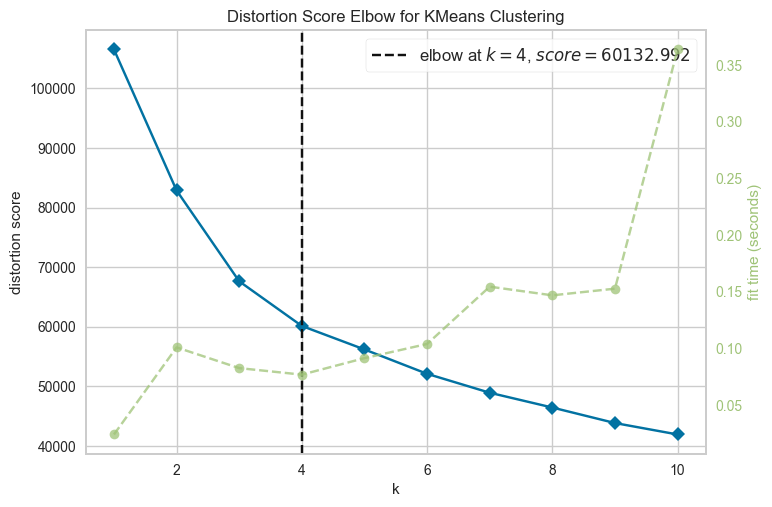

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [482]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

In [483]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(trainX, trainY)
pred1 = kmeans_model.predict(testX)
print(classification_report(testY, pred1))

              precision    recall  f1-score   support

           0       0.22      0.07      0.10      1214
           1       0.06      0.27      0.10       116
           2       0.36      0.27      0.31       367
           3       0.37      0.57      0.45       988

    accuracy                           0.29      2685
   macro avg       0.25      0.29      0.24      2685
weighted avg       0.29      0.29      0.26      2685



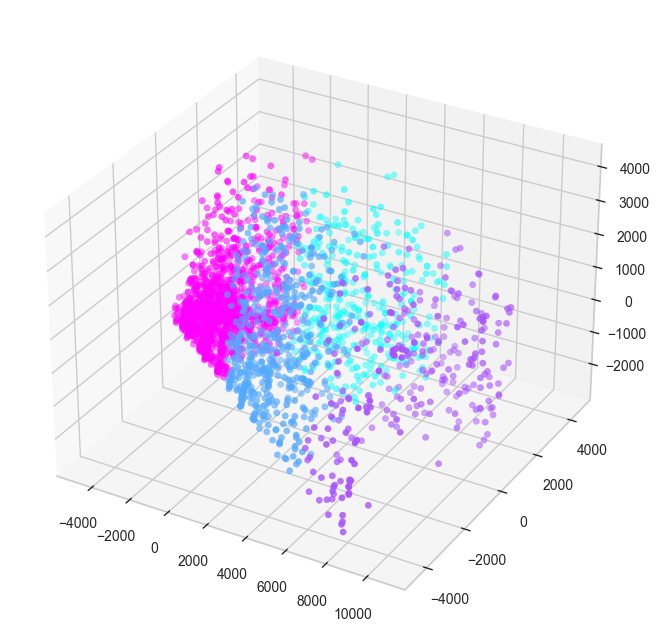

In [484]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(testX), columns=["pca_1", "pca_2", "pca_3"])
plt.figure(figsize=(8, 13))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=pred1, cmap='cool')
plt.show()

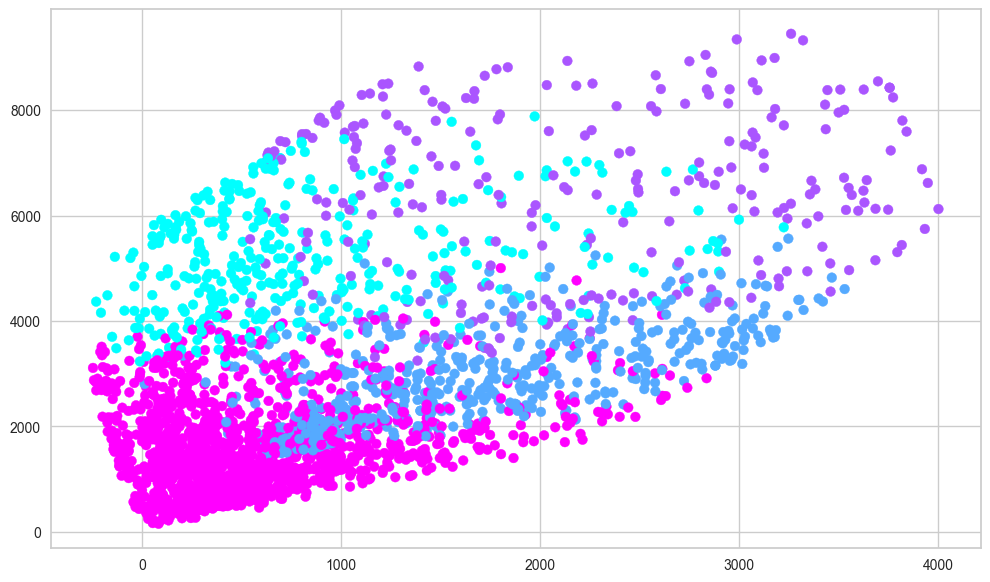

In [485]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(testX), columns=["pca1", "pca2"])
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=pred1, cmap="cool")
plt.show()

### Sử dụng Pipeline

In [486]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('kmeans', KMeans(n_clusters=4))
])
k_model = pipeline.fit(trainX, trainY)
pred2 = k_model.predict(testX)   
print(classification_report(testY, pred2))

              precision    recall  f1-score   support

           0       0.34      0.16      0.22      1214
           1       0.00      0.02      0.01       116
           2       0.04      0.06      0.05       367
           3       0.06      0.06      0.06       988

    accuracy                           0.10      2685
   macro avg       0.11      0.07      0.08      2685
weighted avg       0.18      0.10      0.13      2685



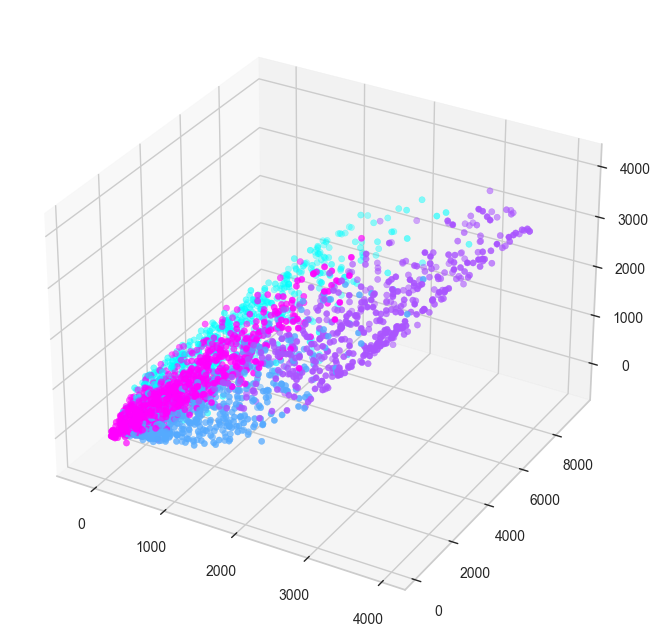

In [487]:
X_pca = pipeline['pca'].transform(testX)
plt.figure(figsize=(8, 13))
ax = plt.subplot(projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pred2, cmap='cool')
plt.show()

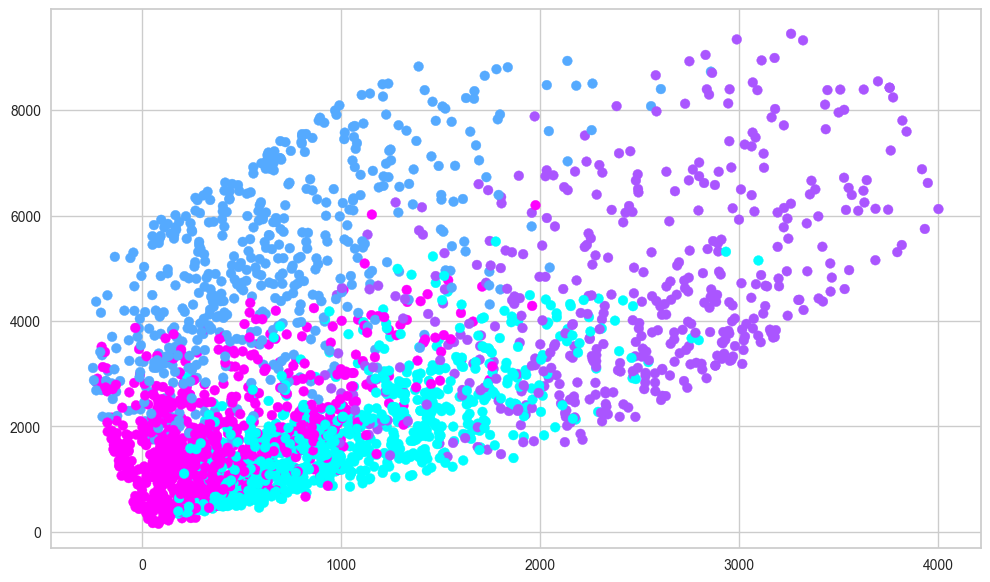

In [488]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4))
])
k_model = pipeline.fit(trainX, trainY)
labels = k_model.predict(testX)
X_pca = pipeline['pca'].transform(testX)
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="cool")
plt.show()

# Discussion & Conclusion

Độ chính xác sau khi clustering khá là thấp đối với bộ dữ liệu này.\
Sau khi trực quan hóa thành scatterplot thì khá là khó nhìn.\
Có thể bởi vì các điểm outliers đã bị thay thế bằng threshold nên dữ liệu mới không được cân bằng.\
Tuy nhiên sau khi dùng pipeline thì độ chính xác của mô hình tăng lên đáng kể và ScatterPlot chi tiết hơn.

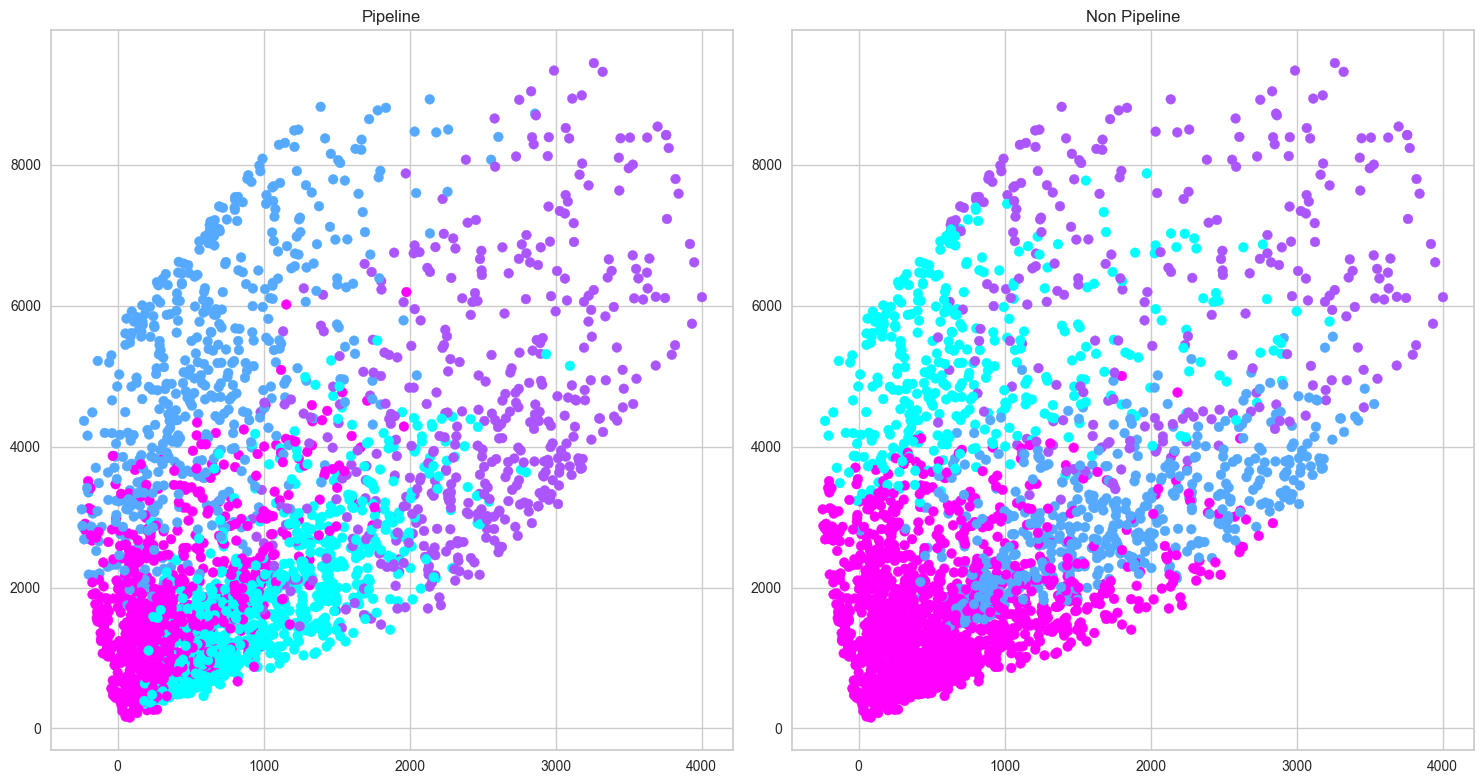

In [491]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="cool")
ax[0].set_title('Pipeline')
ax[1].scatter(pca_df.pca1, pca_df.pca2, c=pred1, cmap="cool")
ax[1].set_title('Non Pipeline')
plt.tight_layout()
plt.show()